<h1>TAREA 8-2</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<li>I Implementar en python una función para segmentar
imágenes utilizando la técnica de árbol piramidal en el
espacio de escala.</li>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>


In [1]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
img = cv2.imread('Fig/face.png',0)

print "Listo"

Listo


/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


[(93, 90, 0), (93, 90, 0), (93, 90, 0), (93, 90, 0), (98, 86, 0), (98, 86, 0), (98, 86, 0), (98, 86, 0), (99, 85, 0), (99, 85, 0), (99, 85, 0), (99, 85, 0), (104, 79, 0), (104, 79, 0), (104, 79, 0), (104, 79, 0)]


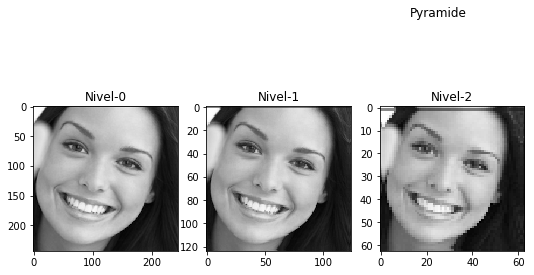

In [6]:
def similar(img,p, px,py):
    pixVal = {}
    pixVal['c'] = abs(img[px][py] -p)
    pixVal['u'] = abs(img[px][py-1] -p)
    pixVal['d'] = abs(img[px][py+1] -p)
    pixVal['l'] = abs(img[px-1][py] -p)
    pixVal['r'] = abs(img[px+1][py] -p)
    for k, v in pixVal.iteritems():
        if v == min(pixVal.values()):
            if k == 'c':
                return px,py
            if k == 'u':
                return px,py-1
            if k == 'd':
                return px,py+1
            if k == 'l':
                return px-1,py
            if k == 'r':
                return px+1,py

def pyramid(img, n = 4):
    pyra = []
    threes = []
    base = img.copy()
    for i in range(n):
        level = 2 ** i
        res = cv2.resize(base,None,fx=1/level, fy=1/level, interpolation = cv2.INTER_NEAREST)
        if(i != 0):
            res = cv2.copyMakeBorder(res,1,1,1,1,cv2.BORDER_REFLECT_101)
        pyra.append(res)
    
    for k in range(len(pyra)-2):
        w,h  = pyra[k].shape
        three = {}
        for i in range(1,w-1):
            for j in range(1,h-1):
                px = int(np.floor(i/(2**k+1)))
                py = int(np.floor(j/(2**k+1)))
                
                px,py = similar(pyra[k+1],pyra[k][i][j], px,py)
                if not pyra[k+1][px][py] in three.keys():
                    three[pyra[k+1][px][py]] = [(px,py,pyra[k+1][px][py])]
                else:
                    three[pyra[k+1][px][py]].append((px,py,pyra[k+1][px][py]))
        threes.append(three)
    return pyra, threes

levels ,three = pyramid(img,3)

plt.figure(1,figsize=(15,5))
plt.suptitle("Pyramide")
for i in range(len(levels)):
    plt.subplot(151+i), plt.imshow(levels[i], cmap=plt.cm.gray), plt.title('Nivel-'+str(i))


/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in ubyte_scalars


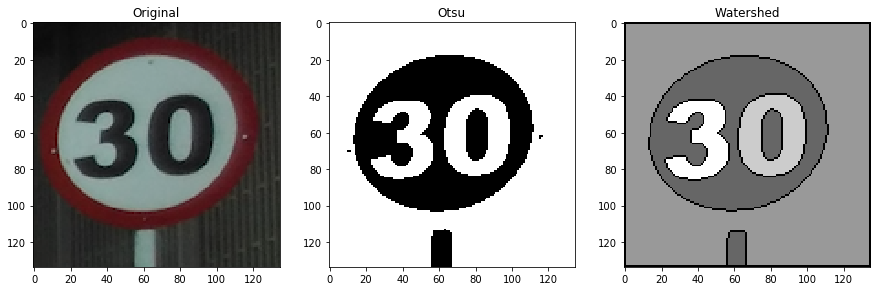

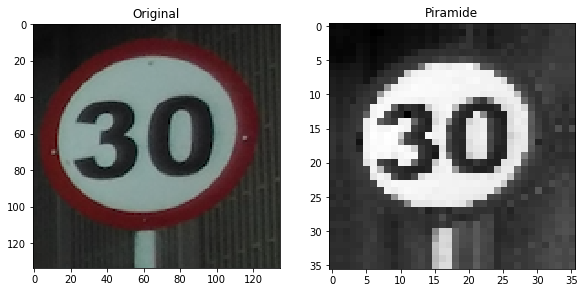

In [8]:
def watershed (img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)



    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.01*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    return markers,thresh


sign1 = cv2.imread('Fig/sign3.png')
levels ,three = pyramid(cv2.cvtColor(sign1, cv2.COLOR_BGR2GRAY),5)

# Proyecto Sergio
markersSign,threshSign=watershed(sign1.copy())



plt.figure(2,figsize=(15,5))
plt.subplot(131), plt.imshow(cv2.cvtColor(sign1, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(132), plt.imshow(threshSign, cmap=plt.cm.gray), plt.title('Otsu')
plt.subplot(133), plt.imshow(markersSign, cmap=plt.cm.gray), plt.title('Watershed')
plt.show()
plt.figure(3,figsize=(15,5))
plt.subplot(131), plt.imshow(cv2.cvtColor(sign1, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(132), plt.imshow(levels[2], cmap=plt.cm.gray), plt.title('Piramide')
plt.show()

In [15]:
unique, counts = np.unique(threshSign, return_counts=True)
unique2, counts2 = np.unique(markersSign, return_counts=True)
print counts
manual = dict(zip(unique2, counts2)).keys()
manual.pop(-1)
manual = np.array(manual)
data1 = np.array(dict(zip(unique, counts)).keys())
data2 = np.array(dict(zip(unique2, counts2)).keys())

def IoU(segOriginal, segManual):
    inter = np.intersect1d(segOriginal, segManual)
    union = np.union1d(segOriginal, segManual)
    return len(inter)/len(union)


def erroRelative(segOriginal, segManual,px,py):
    val = len(np.setdiff1d(np.array(segOriginal[px][py]),np.array(segManual[px][py])))
    print val
    return val/len(np.array(segOriginal[px][py]))
    

print "Intersección-sobre-Unión Piramide",IoU(manual,data1)
print "Intersección-sobre-Unión watershet",IoU(manual,data2)


print "erroRelative",erroRelative(markersSign,markersSign, 100,100)
print "erroRelative",erroRelative(threshSign,markersSign, 100,100)

 [ 4985 13105]
Intersección-sobre-Unión Piramide 0.0
Intersección-sobre-Unión watershet 0.8
erroRelative 0


TypeError: len() of unsized object